In [1137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1138]:
train='/Users/y2z/Desktop/big-mart-sales-prediction/Train.csv'
test='/Users/y2z/Desktop/big-mart-sales-prediction/Test.csv'

In [1139]:
train_set1=pd.read_csv(train)
test_set=pd.read_csv(test)

In [1140]:
train_set1.shape

(8523, 12)

In [1141]:
test_set.shape

(5681, 11)

In [1142]:
train_set=pd.concat([train_set1,test_set])

/Users/y2z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [1143]:
train_set.shape

(14204, 12)

In [1144]:
train_set.sample(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
156,Regular,FDB36,132.5626,262.3252,Baking Goods,0.000000,5.465,2009,OUT018,Tier 3,Medium,Supermarket Type2
5245,Low Fat,FDU04,122.1414,2924.1936,Frozen Foods,0.005557,7.930,1999,OUT049,Tier 1,Medium,Supermarket Type1
1767,Low Fat,FDX21,107.8912,NaN,Snack Foods,0.085447,7.050,2007,OUT017,Tier 2,NaN,Supermarket Type1
2155,Low Fat,FDW11,61.4194,NaN,Breads,0.048773,12.600,2004,OUT035,Tier 2,Small,Supermarket Type1
769,Regular,FDK25,168.9474,NaN,Breakfast,0.157471,11.600,2009,OUT018,Tier 3,Medium,Supermarket Type2


In [1145]:
train_set.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [1146]:
train_set.describe(include='all')

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4
top,Low Fat,FDH28,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN


In [1147]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [1148]:
train_set.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [1149]:
for cols in train_set.columns:
    if(train_set[cols].dtype=='object'):
        print(train_set[cols].value_counts())
        

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
FDH28    10
NCK31    10
FDT60    10
FDZ56    10
FDV28    10
NCK29    10
FDH10    10
FDX32    10
FDO08    10
FDL52    10
NCP02    10
FDW03    10
FDW15    10
FDD38    10
FDC53    10
FDJ53    10
FDU32    10
FDE24    10
FDS47    10
FDY56    10
FDI41    10
NCC07    10
FDR48    10
NCK17    10
FDR33    10
FDY36    10
FDH48    10
FDO01    10
FDS48    10
NCM05    10
         ..
NCF07     8
NCE55     8
FDQ48     8
NCB42     8
FDT26     8
NCO53     8
FDF12     8
FDT38     8
NCG06     8
FDY51     8
NCN05     8
FDA48     8
FDJ40     8
DRE12     8
FDF38     8
FDR60     8
FDU59     8
FDM50     7
FDI46     7
FDS22     7
NCL42     7
FDR51     7
FDM52     7
FDL50     7
FDH58     7
FDO33     7
DRN11     7
FDM10     7
NCW54     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Food

In [1150]:
train_set.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

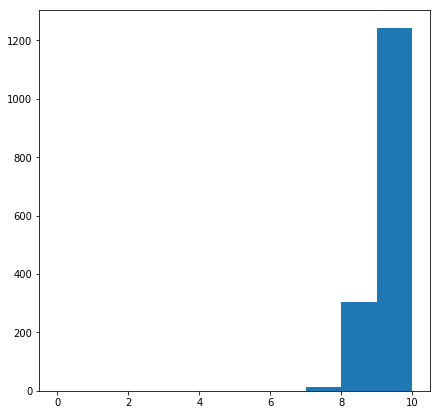

In [1151]:
item_count=train_set['Item_Identifier'].value_counts().sort_values()
plt.figure(figsize=(7,7))
plt.hist(item_count,bins=np.arange(0,11,1))
plt.show()

In [1152]:
item_count_df=pd.DataFrame(item_count)

In [1153]:
item_count_df.sample(5)

,Item_Identifier
FDJ36,9
NCG07,9
FDQ10,9
FDH34,9
NCW41,8


In [1154]:
item_cnt=(item_count_df['Item_Identifier'].value_counts()/sum(item_count_df['Item_Identifier']))*100

In [1155]:
item_cnt

9     5.188679
10    3.548296
8     2.147282
7     0.091524
Name: Item_Identifier, dtype: float64

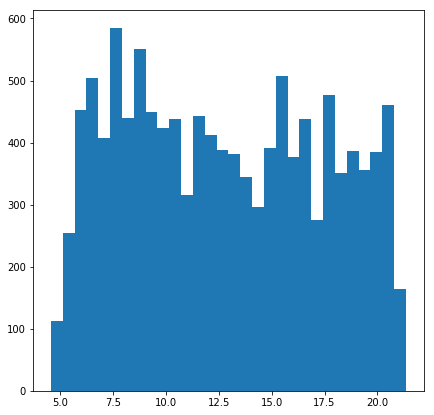

In [1156]:
train_set['Item_Weight'].describe(include='all')
train_w_null=train_set['Item_Weight'].dropna()
plt.figure(figsize=(7,7))
plt.hist(train_w_null,bins=30)
plt.show()

In [1157]:
train_set['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [1158]:
fat_mapping={'LF':'Low Fat','low fat':'Low Fat','reg':'Regular','Low Fat':'Low Fat','Regular':'Regular'}
train_set['Item_Fat_Content']=train_set['Item_Fat_Content'].map(fat_mapping)

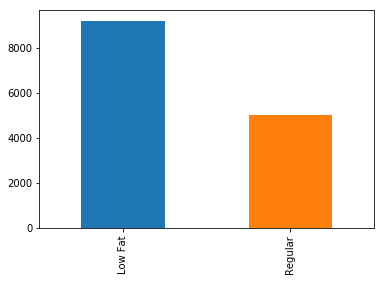

In [1159]:
train_set['Item_Fat_Content'].value_counts().plot('bar')



In [1160]:
train_set['Item_Fat_Content'].value_counts()



Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [1161]:
train_set.sample(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
6726,Regular,FDF34,199.1084,396.8168,Snack Foods,0.014041,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
5978,Low Fat,DRJ11,189.0872,3970.8312,Hard Drinks,0.085075,9.50,2004,OUT035,Tier 2,Small,Supermarket Type1
5479,Regular,DRC36,174.1054,4377.6350,Soft Drinks,0.045239,13.00,2007,OUT017,Tier 2,NaN,Supermarket Type1
3784,Low Fat,NCR18,44.5112,NaN,Household,0.020471,15.85,1987,OUT013,Tier 3,High,Supermarket Type1
1079,Low Fat,FDL43,77.7670,NaN,Meat,0.027119,10.10,2002,OUT045,Tier 2,NaN,Supermarket Type1


In [1162]:
visi_size=train_set.groupby('Outlet_Size',as_index=False)[['Item_Visibility']].mean()

In [1163]:
visi_size

,Outlet_Size,Item_Visibility
0,High,0.060242
1,Medium,0.059774
2,Small,0.070872


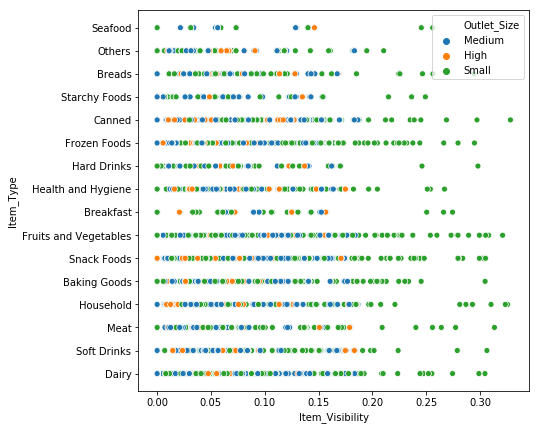

In [1164]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=train_set,y='Item_Type',x='Item_Visibility',hue='Outlet_Size')
plt.show()

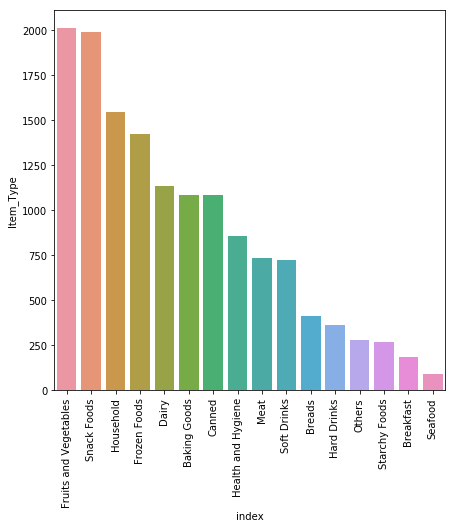

In [1165]:
item_type=train_set['Item_Type'].value_counts().reset_index()
plt.figure(figsize=(7,7))
sns.barplot(x='index',y='Item_Type',data=item_type)
plt.xticks(rotation=90)
plt.show()

In [1166]:
item_type.columns

Index(['index', 'Item_Type'], dtype='object')

In [1167]:
iden_type=train_set.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Identifier'].unique()

In [1168]:
iden_type

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store        [OUT010]
OUT013             Supermarket Type1    [OUT013]
OUT017             Supermarket Type1    [OUT017]
OUT018             Supermarket Type2    [OUT018]
OUT019             Grocery Store        [OUT019]
OUT027             Supermarket Type3    [OUT027]
OUT035             Supermarket Type1    [OUT035]
OUT045             Supermarket Type1    [OUT045]
OUT046             Supermarket Type1    [OUT046]
OUT049             Supermarket Type1    [OUT049]
Name: Outlet_Identifier, dtype: object

In [1169]:
train_set.sample(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
1042,Low Fat,NCP18,151.9708,3611.2992,Household,0.028715,12.150,2009,OUT018,Tier 3,Medium,Supermarket Type2
1613,Low Fat,FDK52,223.8062,4288.4178,Frozen Foods,0.079153,18.250,1987,OUT013,Tier 3,High,Supermarket Type1
6943,Regular,FDG34,107.5254,325.5762,Snack Foods,0.037647,11.500,2002,OUT045,Tier 2,NaN,Supermarket Type1
4593,Regular,FDR31,144.6102,2916.2040,Fruits and Vegetables,0.049122,6.460,1987,OUT013,Tier 3,High,Supermarket Type1
1161,Low Fat,NCR29,58.3930,509.3370,Health and Hygiene,0.054863,7.565,2009,OUT018,Tier 3,Medium,Supermarket Type2


In [1170]:
estab_year=train_set.groupby('Outlet_Establishment_Year',as_index=False)[['Outlet_Identifier']].count().sort_values(by='Outlet_Identifier',ascending=False)

In [1171]:
estab_year

,Outlet_Establishment_Year,Outlet_Identifier
0,1985,2439
1,1987,1553
2,1997,1550
4,1999,1550
6,2004,1550
5,2002,1548
8,2009,1546
7,2007,1543
3,1998,925


In [1172]:
type_size=train_set 

In [1173]:
type_size

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [1174]:
train_set[train_set['Item_Visibility']==0]=np.nan
IV_mean=train_set.dropna()
IV_mean=IV_mean['Item_Visibility'].mean()

In [1175]:
IV_mean

0.06476760394814128

In [1176]:
train_set['Item_Visibility'].fillna(0.06476760394814128,inplace=True)

In [1177]:
train_set
        

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009.0,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
3,NaN,NaN,NaN,NaN,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987.0,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985.0,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002.0,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007.0,OUT017,Tier 2,NaN,Supermarket Type1


In [1178]:
train_set[train_set['Item_Outlet_Sales']==0]=np.nan
IO_mean=train_set.dropna()
IO_mean=IO_mean['Item_Outlet_Sales'].mean()
IO_mean
train_set['Item_Outlet_Sales'].fillna(2275.359277879763,inplace=True)
train_set

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.138000,Dairy,0.016047,9.300,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.422800,Soft Drinks,0.019278,5.920,2009.0,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.270000,Meat,0.016760,17.500,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
3,NaN,NaN,NaN,2275.359278,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2275.359278,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,2275.359278,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
6,Regular,FDO10,57.6588,343.552800,Snack Foods,0.012741,13.650,1987.0,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.7622,4022.763600,Snack Foods,0.127470,NaN,1985.0,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.9726,1076.598600,Frozen Foods,0.016687,16.200,2002.0,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,4710.535000,Frozen Foods,0.094450,19.200,2007.0,OUT017,Tier 2,NaN,Supermarket Type1


In [1179]:
train_set[train_set['Item_MRP']==0]=np.nan
mrp_mean=train_set.dropna()
mrp_mean=mrp_mean['Item_MRP'].mean()
print(mrp_mean)
train_set['Item_MRP'].fillna(141.12423,inplace=True)
train_set

141.12423270770086


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.80920,3735.138000,Dairy,0.016047,9.300,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.26920,443.422800,Soft Drinks,0.019278,5.920,2009.0,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.61800,2097.270000,Meat,0.016760,17.500,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
3,NaN,NaN,141.12423,2275.359278,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,141.12423,2275.359278,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,141.12423,2275.359278,NaN,0.064768,NaN,NaN,NaN,NaN,NaN,NaN
6,Regular,FDO10,57.65880,343.552800,Snack Foods,0.012741,13.650,1987.0,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.76220,4022.763600,Snack Foods,0.127470,NaN,1985.0,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.97260,1076.598600,Frozen Foods,0.016687,16.200,2002.0,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.82140,4710.535000,Frozen Foods,0.094450,19.200,2007.0,OUT017,Tier 2,NaN,Supermarket Type1


In [1180]:
train_set[train_set['Item_Weight']==0]=np.nan
weight_mean=train_set.dropna()
weight_mean=weight_mean['Item_Weight'].mean()
print(weight_mean)
train_set['Item_Weight'].fillna(12.804070521667395,inplace=True)
train_set

12.804070521667395


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.80920,3735.138000,Dairy,0.016047,9.300000,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.26920,443.422800,Soft Drinks,0.019278,5.920000,2009.0,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.61800,2097.270000,Meat,0.016760,17.500000,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
3,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,NaN,NaN,NaN,NaN,NaN
6,Regular,FDO10,57.65880,343.552800,Snack Foods,0.012741,13.650000,1987.0,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.76220,4022.763600,Snack Foods,0.127470,12.804071,1985.0,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.97260,1076.598600,Frozen Foods,0.016687,16.200000,2002.0,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.82140,4710.535000,Frozen Foods,0.094450,19.200000,2007.0,OUT017,Tier 2,NaN,Supermarket Type1


In [1181]:
train_set['Outlet_Establishment_Year'].fillna(1985,inplace=True)
train_set

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.80920,3735.138000,Dairy,0.016047,9.300000,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.26920,443.422800,Soft Drinks,0.019278,5.920000,2009.0,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.61800,2097.270000,Meat,0.016760,17.500000,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
3,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,NaN,NaN,NaN
4,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,NaN,NaN,NaN
5,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,NaN,NaN,NaN
6,Regular,FDO10,57.65880,343.552800,Snack Foods,0.012741,13.650000,1987.0,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.76220,4022.763600,Snack Foods,0.127470,12.804071,1985.0,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.97260,1076.598600,Frozen Foods,0.016687,16.200000,2002.0,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.82140,4710.535000,Frozen Foods,0.094450,19.200000,2007.0,OUT017,Tier 2,NaN,Supermarket Type1


In [1182]:
train_set.groupby(['Outlet_Establishment_Year','Outlet_Location_Type'])['Outlet_Location_Type'].count()

Outlet_Establishment_Year  Outlet_Location_Type
1985.0                     Tier 1                   830
                           Tier 3                  1463
1987.0                     Tier 3                  1455
1997.0                     Tier 1                  1452
1998.0                     Tier 3                   872
1999.0                     Tier 1                  1438
2002.0                     Tier 2                  1455
2004.0                     Tier 2                  1458
2007.0                     Tier 2                  1459
2009.0                     Tier 3                  1443
Name: Outlet_Location_Type, dtype: int64

In [1183]:
loc_mapping={'Tier 1':1,'Tier 2':2,'Tier 3':3}
train_set['Outlet_Location_Type']=train_set['Outlet_Location_Type'].map(loc_mapping)
    

In [1184]:
train_set

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.80920,3735.138000,Dairy,0.016047,9.300000,1999.0,OUT049,1.0,Medium,Supermarket Type1
1,Regular,DRC01,48.26920,443.422800,Soft Drinks,0.019278,5.920000,2009.0,OUT018,3.0,Medium,Supermarket Type2
2,Low Fat,FDN15,141.61800,2097.270000,Meat,0.016760,17.500000,1999.0,OUT049,1.0,Medium,Supermarket Type1
3,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,NaN,NaN,NaN
4,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,NaN,NaN,NaN
5,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,NaN,NaN,NaN
6,Regular,FDO10,57.65880,343.552800,Snack Foods,0.012741,13.650000,1987.0,OUT013,3.0,High,Supermarket Type1
7,Low Fat,FDP10,107.76220,4022.763600,Snack Foods,0.127470,12.804071,1985.0,OUT027,3.0,Medium,Supermarket Type3
8,Regular,FDH17,96.97260,1076.598600,Frozen Foods,0.016687,16.200000,2002.0,OUT045,2.0,NaN,Supermarket Type1
9,Regular,FDU28,187.82140,4710.535000,Frozen Foods,0.094450,19.200000,2007.0,OUT017,2.0,NaN,Supermarket Type1


In [1185]:
train_set.groupby(['Outlet_Location_Type'])['Outlet_Location_Type'].count()

Outlet_Location_Type
1.0    3720
2.0    4372
3.0    5233
Name: Outlet_Location_Type, dtype: int64

In [1186]:
train_set['Outlet_Location_Type'].fillna(3,inplace=True)

In [1187]:
train_set

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.80920,3735.138000,Dairy,0.016047,9.300000,1999.0,OUT049,1.0,Medium,Supermarket Type1
1,Regular,DRC01,48.26920,443.422800,Soft Drinks,0.019278,5.920000,2009.0,OUT018,3.0,Medium,Supermarket Type2
2,Low Fat,FDN15,141.61800,2097.270000,Meat,0.016760,17.500000,1999.0,OUT049,1.0,Medium,Supermarket Type1
3,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,NaN,NaN
4,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,NaN,NaN
5,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,NaN,NaN
6,Regular,FDO10,57.65880,343.552800,Snack Foods,0.012741,13.650000,1987.0,OUT013,3.0,High,Supermarket Type1
7,Low Fat,FDP10,107.76220,4022.763600,Snack Foods,0.127470,12.804071,1985.0,OUT027,3.0,Medium,Supermarket Type3
8,Regular,FDH17,96.97260,1076.598600,Frozen Foods,0.016687,16.200000,2002.0,OUT045,2.0,NaN,Supermarket Type1
9,Regular,FDU28,187.82140,4710.535000,Frozen Foods,0.094450,19.200000,2007.0,OUT017,2.0,NaN,Supermarket Type1


In [1188]:
size_mapping={'Small':1,'Medium':2,'High':3}
train_set['Outlet_Size']=train_set['Outlet_Size'].map(size_mapping)

In [1189]:
train_set.sample(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
898,Regular,FDD59,78.9960,2275.359278,Starchy Foods,0.066284,10.500000,1999.0,OUT049,1.0,2.0,Supermarket Type1
5379,Low Fat,DRD49,237.9564,2275.359278,Soft Drinks,0.167018,12.804071,1985.0,OUT027,3.0,2.0,Supermarket Type3
972,Low Fat,FDQ22,39.1822,314.257600,Snack Foods,0.029800,16.750000,2002.0,OUT045,2.0,NaN,Supermarket Type1
4799,Regular,FDH45,42.0796,454.075600,Fruits and Vegetables,0.105881,15.100000,2002.0,OUT045,2.0,NaN,Supermarket Type1
2446,Low Fat,NCA06,35.9190,585.904000,Household,0.142590,12.804071,1985.0,OUT027,3.0,2.0,Supermarket Type3


In [1190]:
train_set.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
1.0    3740
2.0    4344
3.0    1455
Name: Outlet_Size, dtype: int64

In [1191]:
train_set['Outlet_Size'].fillna(2,inplace=True)

In [1192]:
train_set

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.80920,3735.138000,Dairy,0.016047,9.300000,1999.0,OUT049,1.0,2.0,Supermarket Type1
1,Regular,DRC01,48.26920,443.422800,Soft Drinks,0.019278,5.920000,2009.0,OUT018,3.0,2.0,Supermarket Type2
2,Low Fat,FDN15,141.61800,2097.270000,Meat,0.016760,17.500000,1999.0,OUT049,1.0,2.0,Supermarket Type1
3,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,NaN
4,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,NaN
5,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,NaN
6,Regular,FDO10,57.65880,343.552800,Snack Foods,0.012741,13.650000,1987.0,OUT013,3.0,3.0,Supermarket Type1
7,Low Fat,FDP10,107.76220,4022.763600,Snack Foods,0.127470,12.804071,1985.0,OUT027,3.0,2.0,Supermarket Type3
8,Regular,FDH17,96.97260,1076.598600,Frozen Foods,0.016687,16.200000,2002.0,OUT045,2.0,2.0,Supermarket Type1
9,Regular,FDU28,187.82140,4710.535000,Frozen Foods,0.094450,19.200000,2007.0,OUT017,2.0,2.0,Supermarket Type1


In [1193]:
train_set.groupby('Outlet_Type')['Outlet_Type'].count()

Outlet_Type
Grocery Store        1702
Supermarket Type1    8717
Supermarket Type2    1443
Supermarket Type3    1463
Name: Outlet_Type, dtype: int64

In [1194]:
ot_mapping={'Grocery Store':1,'Supermarket Type1':2,'Supermarket Type2':3,'Supermarket Type3':4}
train_set['Outlet_Type']=train_set['Outlet_Type'].map(ot_mapping)
train_set

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.80920,3735.138000,Dairy,0.016047,9.300000,1999.0,OUT049,1.0,2.0,2.0
1,Regular,DRC01,48.26920,443.422800,Soft Drinks,0.019278,5.920000,2009.0,OUT018,3.0,2.0,3.0
2,Low Fat,FDN15,141.61800,2097.270000,Meat,0.016760,17.500000,1999.0,OUT049,1.0,2.0,2.0
3,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,NaN
4,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,NaN
5,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,NaN
6,Regular,FDO10,57.65880,343.552800,Snack Foods,0.012741,13.650000,1987.0,OUT013,3.0,3.0,2.0
7,Low Fat,FDP10,107.76220,4022.763600,Snack Foods,0.127470,12.804071,1985.0,OUT027,3.0,2.0,4.0
8,Regular,FDH17,96.97260,1076.598600,Frozen Foods,0.016687,16.200000,2002.0,OUT045,2.0,2.0,2.0
9,Regular,FDU28,187.82140,4710.535000,Frozen Foods,0.094450,19.200000,2007.0,OUT017,2.0,2.0,2.0


In [1195]:
train_set['Outlet_Type'].fillna(2,inplace=True)
train_set

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.80920,3735.138000,Dairy,0.016047,9.300000,1999.0,OUT049,1.0,2.0,2.0
1,Regular,DRC01,48.26920,443.422800,Soft Drinks,0.019278,5.920000,2009.0,OUT018,3.0,2.0,3.0
2,Low Fat,FDN15,141.61800,2097.270000,Meat,0.016760,17.500000,1999.0,OUT049,1.0,2.0,2.0
3,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
4,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
5,NaN,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
6,Regular,FDO10,57.65880,343.552800,Snack Foods,0.012741,13.650000,1987.0,OUT013,3.0,3.0,2.0
7,Low Fat,FDP10,107.76220,4022.763600,Snack Foods,0.127470,12.804071,1985.0,OUT027,3.0,2.0,4.0
8,Regular,FDH17,96.97260,1076.598600,Frozen Foods,0.016687,16.200000,2002.0,OUT045,2.0,2.0,2.0
9,Regular,FDU28,187.82140,4710.535000,Frozen Foods,0.094450,19.200000,2007.0,OUT017,2.0,2.0,2.0


In [1196]:
train_set=train_set.drop('Item_Identifier',axis=1)

In [1197]:
train_set

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,249.80920,3735.138000,Dairy,0.016047,9.300000,1999.0,OUT049,1.0,2.0,2.0
1,Regular,48.26920,443.422800,Soft Drinks,0.019278,5.920000,2009.0,OUT018,3.0,2.0,3.0
2,Low Fat,141.61800,2097.270000,Meat,0.016760,17.500000,1999.0,OUT049,1.0,2.0,2.0
3,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
4,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
5,NaN,141.12423,2275.359278,NaN,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
6,Regular,57.65880,343.552800,Snack Foods,0.012741,13.650000,1987.0,OUT013,3.0,3.0,2.0
7,Low Fat,107.76220,4022.763600,Snack Foods,0.127470,12.804071,1985.0,OUT027,3.0,2.0,4.0
8,Regular,96.97260,1076.598600,Frozen Foods,0.016687,16.200000,2002.0,OUT045,2.0,2.0,2.0
9,Regular,187.82140,4710.535000,Frozen Foods,0.094450,19.200000,2007.0,OUT017,2.0,2.0,2.0


In [1198]:
train_set.groupby('Item_Fat_Content')['Item_Fat_Content'].count()

Item_Fat_Content
Low Fat    8624
Regular    4701
Name: Item_Fat_Content, dtype: int64

In [1199]:
train_set['Item_Fat_Content'].fillna('Low Fat',inplace=True)

In [1200]:
train_set.groupby('Item_Fat_Content')['Item_Fat_Content'].count()

Item_Fat_Content
Low Fat    9503
Regular    4701
Name: Item_Fat_Content, dtype: int64

In [1201]:
train_set['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', nan, 'Snack Foods', 'Frozen Foods',
       'Fruits and Vegetables', 'Breakfast', 'Health and Hygiene',
       'Hard Drinks', 'Baking Goods', 'Household', 'Canned', 'Breads',
       'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [1202]:
item_type_mapping={'Dairy':'Food','Meat':'Food','Snack Foods':'Food','Frozen Foods':'Food','Fruits and Vegetables':'Food','Breakfast':'Food','Breads':'Food','Starchy Foods':'Food','Seafood':'Food','Soft Drinks':'Drinks','Hard Drinks':'Drinks','Health and Hygiene':'Others','Baking Goods':'Others','Household':'Others','Canned':'Others','Others':'Others'}

In [1203]:
train_set['Item_Type']=train_set['Item_Type'].map(item_type_mapping)

In [1099]:
train_set.groupby('Item_Type')['Item_Type'].count()

Item_Type
Drinks    1016
Food      7755
Others    4554
Name: Item_Type, dtype: int64

In [1100]:
train_set['Item_Type'].fillna('Food',inplace=True)

In [1101]:
train_set

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,249.80920,3735.138000,Food,0.016047,9.300000,1999.0,OUT049,1.0,2.0,2.0
1,Regular,48.26920,443.422800,Drinks,0.019278,5.920000,2009.0,OUT018,3.0,2.0,3.0
2,Low Fat,141.61800,2097.270000,Food,0.016760,17.500000,1999.0,OUT049,1.0,2.0,2.0
3,Low Fat,141.12423,2275.359278,Food,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
4,Low Fat,141.12423,2275.359278,Food,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
5,Low Fat,141.12423,2275.359278,Food,0.064768,12.804071,1985.0,NaN,3.0,2.0,2.0
6,Regular,57.65880,343.552800,Food,0.012741,13.650000,1987.0,OUT013,3.0,3.0,2.0
7,Low Fat,107.76220,4022.763600,Food,0.127470,12.804071,1985.0,OUT027,3.0,2.0,4.0
8,Regular,96.97260,1076.598600,Food,0.016687,16.200000,2002.0,OUT045,2.0,2.0,2.0
9,Regular,187.82140,4710.535000,Food,0.094450,19.200000,2007.0,OUT017,2.0,2.0,2.0


In [1102]:
train_set=train_set.drop('Outlet_Identifier',axis=1)

In [1103]:
train_set

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,249.80920,3735.138000,Food,0.016047,9.300000,1999.0,1.0,2.0,2.0
1,Regular,48.26920,443.422800,Drinks,0.019278,5.920000,2009.0,3.0,2.0,3.0
2,Low Fat,141.61800,2097.270000,Food,0.016760,17.500000,1999.0,1.0,2.0,2.0
3,Low Fat,141.12423,2275.359278,Food,0.064768,12.804071,1985.0,3.0,2.0,2.0
4,Low Fat,141.12423,2275.359278,Food,0.064768,12.804071,1985.0,3.0,2.0,2.0
5,Low Fat,141.12423,2275.359278,Food,0.064768,12.804071,1985.0,3.0,2.0,2.0
6,Regular,57.65880,343.552800,Food,0.012741,13.650000,1987.0,3.0,3.0,2.0
7,Low Fat,107.76220,4022.763600,Food,0.127470,12.804071,1985.0,3.0,2.0,4.0
8,Regular,96.97260,1076.598600,Food,0.016687,16.200000,2002.0,2.0,2.0,2.0
9,Regular,187.82140,4710.535000,Food,0.094450,19.200000,2007.0,2.0,2.0,2.0


In [1104]:
fat_mapping={'Low Fat':1,'Regular':2}
item_mapping={'Food':1,'Drinks':2,'Others':3}

In [1105]:
train_set['Item_Fat_Content']=train_set['Item_Fat_Content'].map(fat_mapping)
train_set['Item_Type']=train_set['Item_Type'].map(item_mapping)

In [1106]:
train_set.sample(5)

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
3625,2,103.0332,2275.359278,1,0.080038,16.500000,2009.0,3.0,2.0,3.0
4284,1,210.3928,2275.359278,1,0.015492,12.150000,2002.0,2.0,2.0,2.0
4173,1,54.6956,764.338400,3,0.092937,8.970000,1987.0,3.0,3.0,2.0
362,1,81.8960,878.856000,3,0.080758,14.350000,2002.0,2.0,2.0,2.0
6942,2,256.3988,256.998800,1,0.118536,12.804071,1985.0,1.0,1.0,1.0


In [1107]:
train_set.groupby('Outlet_Establishment_Year')['Outlet_Establishment_Year'].count()

Outlet_Establishment_Year
1985.0    3172
1987.0    1455
1997.0    1452
1998.0     872
1999.0    1438
2002.0    1455
2004.0    1458
2007.0    1459
2009.0    1443
Name: Outlet_Establishment_Year, dtype: int64

In [1108]:
estab_mapping={1985.0:1,1987.0:2,1997.0:3,1998.0:4,1999.0:5,2002.0:6,2004.0:7,2007.0:8,2009.0:9}

In [1109]:
train_set['Outlet_Establishment_Year']=train_set['Outlet_Establishment_Year'].map(estab_mapping)

In [1110]:
train_set

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,1,249.80920,3735.138000,1,0.016047,9.300000,5,1.0,2.0,2.0
1,2,48.26920,443.422800,2,0.019278,5.920000,9,3.0,2.0,3.0
2,1,141.61800,2097.270000,1,0.016760,17.500000,5,1.0,2.0,2.0
3,1,141.12423,2275.359278,1,0.064768,12.804071,1,3.0,2.0,2.0
4,1,141.12423,2275.359278,1,0.064768,12.804071,1,3.0,2.0,2.0
5,1,141.12423,2275.359278,1,0.064768,12.804071,1,3.0,2.0,2.0
6,2,57.65880,343.552800,1,0.012741,13.650000,2,3.0,3.0,2.0
7,1,107.76220,4022.763600,1,0.127470,12.804071,1,3.0,2.0,4.0
8,2,96.97260,1076.598600,1,0.016687,16.200000,6,2.0,2.0,2.0
9,2,187.82140,4710.535000,1,0.094450,19.200000,8,2.0,2.0,2.0


In [1111]:
train_set.describe(include='all')

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,1.330963,141.106879,2220.868971,1.712757,0.069961,12.798076,4.555829,2.168403,1.839130,2.187764
std,0.470576,60.062921,1279.616669,0.919794,0.048609,4.097751,2.798481,0.814792,0.582998,0.773434
min,1.000000,31.290000,33.290000,1.000000,0.003575,4.555000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,97.008750,1574.450550,1.000000,0.033143,9.600000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,141.124230,2275.359278,1.000000,0.062347,12.804071,5.000000,2.000000,2.000000,2.000000
75%,2.000000,183.302900,2275.359278,3.000000,0.094037,15.700000,7.000000,3.000000,2.000000,2.000000
max,2.000000,266.888400,13086.964800,3.000000,0.328391,21.350000,9.000000,3.000000,3.000000,4.000000


In [1112]:
target=train_set['Item_Type']
df=train_set.drop('Item_Type',axis=1)

In [1135]:
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=.22)

In [1136]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
logreg_score=round(accuracy_score(y_pred,y_test)*100,2)
print(logreg_score)

60.8


/Users/y2z/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/y2z/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [1134]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
acc_gbc=round(accuracy_score(y_pred,y_test)*100,2)
print(acc_gbc)

67.84
